In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-course-work-boston-housing/boston_housing.csv


# Task 1: Become familiar with the dataset
## The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

Note. Task 2 and 3 is to set up an account to IBM and load required documents, since i am doing in kaggle. we dont need T2 and T3 

In [69]:
boston_df=pd.read_csv('/kaggle/input/ibm-course-work-boston-housing/boston_housing.csv')
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

## Question 1:  For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median Value of Owner Occupied Homes')

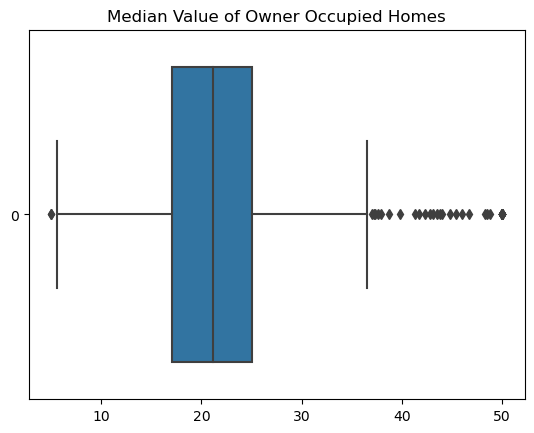

In [70]:
sns.boxplot(boston_df['MEDV'], orient='h').set_title('Median Value of Owner Occupied Homes')

## Question 2: Provide a bar plot for the Charles river variable

Text(0.5, 1.0, 'Number of homes near the Charles River')

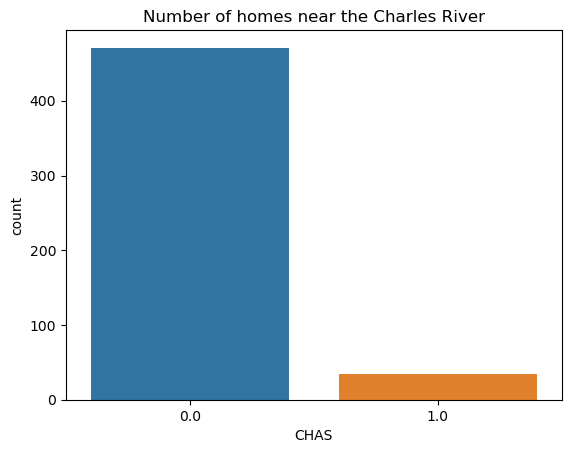

In [71]:
sns.countplot(x='CHAS', data=boston_df).set_title('Number of homes near the Charles River')

## Question 3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median Value of owner-occupied homes per age group')

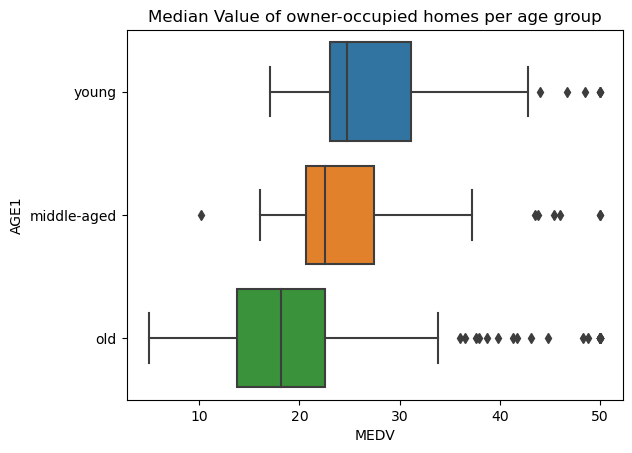

In [72]:
boston_df['AGE1'] = pd.cut(boston_df['AGE'], bins=[1, 35, 70, 100], labels=['young', 'middle-aged', 'old'])
sns.boxplot(x = 'MEDV', y='AGE1', data = boston_df).set_title('Median Value of owner-occupied homes per age group')


## Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentration vs proportion of non-retail business acres per town')

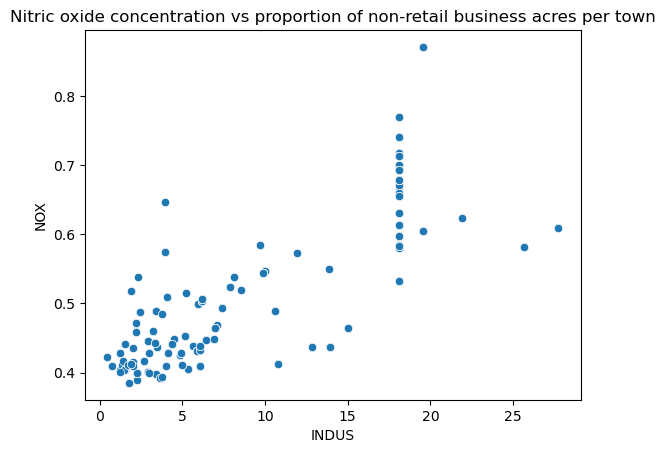

In [73]:
sns.scatterplot(x="INDUS", y="NOX", data=boston_df).set_title('Nitric oxide concentration vs proportion of non-retail business acres per town')

The scatter plot's lower left quadrant displays a strong association between low levels of Nitric oxide concentration and a low percentage of non-retail business acres per town.

## Question 5:  Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

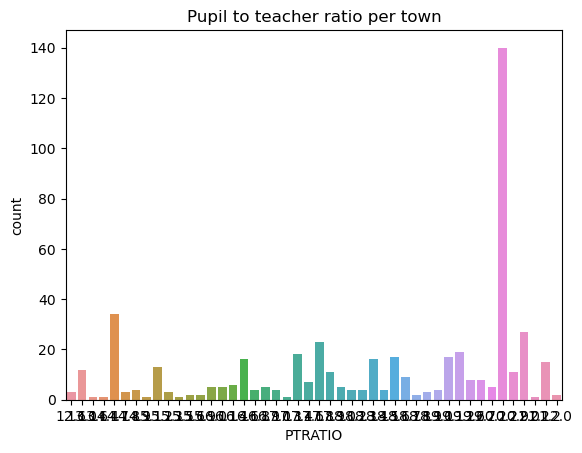

In [74]:
sns.countplot(x = 'PTRATIO', data = boston_df).set_title('Pupil to teacher ratio per town')

# Task 5: Use the appropriate tests to answer the questions provided

## Question 6:  Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### H_0: No significant difference in median values of houses bounded or not bounded by charles river.

#### H_1: There is significant values of median values of houses bounded or not bounded by charles river.


In [75]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS1'] = 'not_bound'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS1'] = 'bound'
#boston_df.head()
t_statistic = scipy.stats.ttest_ind(boston_df[boston_df['CHAS1'] == 'not_bound']['MEDV'], 
                      boston_df[boston_df['CHAS1'] == 'bound']['MEDV'], equal_var = True)
print(t_statistic)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)


#### Since the p-value is less than 0.05, we can reject the Null Hypothesis and accept the Alternative Hypothesis. This means that there is a significant difference in the median value of houses located near the Charles River compared to those that are not.

## Question 7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Hypothesis

H
_
0
:
µ
_
1
=
µ
_
2
=
µ
_
3
  (the three age population means are equal)

H
_
1
:
  At least one of the means differ

In [76]:
old =boston_df[boston_df['AGE1'] == 'old']['MEDV']
middle_aged = boston_df[boston_df['AGE1'] == 'middle-aged']['MEDV']
young = boston_df[boston_df['AGE1'] == 'young']['MEDV']
                   

In [77]:
f_statistic, p_value = scipy.stats.f_oneway(old, middle_aged, young)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.





## Question 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### H_0: Nitric Oxide concentration"NOX" is not related proportion of non-retail business acres per town"INDUS"

#### H_1: Nitric Oxide concentration"NOX" is related with the proportion of non-retail business acres per town"INDUS"

In [78]:
scipy.stats.pearsonr(x = boston_df['NOX'], y = boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

#### The obtained p-value of 7.913361061238693e-98 provides strong evidence to reject the Null Hypothesis, suggesting that there is a significant relationship between the concentrations of Nitric Oxide and the proportion of non-retail business acres per town. Furthermore, the high positive correlation coefficient of 0.7637 indicates a robust positive association between the two variables.

## Question 9: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### H_o: there is no significant relationship between an additional weighted distance to the five Boston employment centers and the median value of owner-occupied homes.

#### H_1: An additional weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes.

In [79]:
import statsmodels.api as sm

X = boston_df['DIS'] # predictor variables
y = boston_df['MEDV'] # response variable
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)


model.summary()

#R-square is 0.061, R will be √0.062, correlation coefficient is 0.817. T a correlation coefficient of 0.817 suggests a strong positive relationship between the two variables being analyzed.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        07:35:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As the p-value is below the significance level of 0.05, we reject the null hypothesis and conclude that there is significant evidence to suggest an impact on the median value of owner-occupied homes based on the weighted distances to the five Boston employment centers. 
#### The coefficient for the variable DIS is 1.0916, which suggests that an increase of one unit in the weighted distance to the five employment centers in Boston is associated with an increase of 1.0916 in the median value of owner-occupied homes. Therefore, the coefficient indicates that the further away a house is from the employment centers, the lower its median value is likely to be.